# Modelos de Random Forest para Pedigrí Forense.

Modelos de random forest para resolver el problema de clasificación de registros en pedigrí forense, haciendo una comparativa entre modelos con parámetros por defecto y una búsqueda de los mejores parámetros mediante Grid Search en datos balanceados con relación de paternidad 

---

## Configuración de la sección

En esta sección se realiza lo siguiente:
- Importado de las librerías necesarias para trabajar en todo el *notebook*.
- Exploración de los datos.
- Separación de los datos en entrenamiento y pruebas.
- Selección de las variables X y Y para el entrenamiento del modelo.

In [1]:
# Imports
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the CSV files with pandas

df_train = pd.read_csv("../../data/processed/definitive-three-classes/train.csv")
df_test = pd.read_csv("../../data/processed/definitive-three-classes/test.csv")

In [3]:
# Exploring the data

df_train.head()

,Shared_Markers,k0,k1,k2,Share_allele,Value,Marcadores,Software,Datos,Kinship,File,Hoja,Sheet,Value_range,FAM_Sample_info_id,FAM_Sample_info_rel,VIC_Sample_info_id,VIC_Sample_info_rel,ValueLog10,True_positive
0,15,0,11,4,19,100.000,15,ScreenMatch,Simulados,Paternidad,15_ScreenMatch_Simulados_Paternidad_allele,Process_LIPI-1,1:749,100-999,83202,S,66302,F,2.000000,1.0
1,15,0,5,10,25,694.085,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-1,1:749,100-999,30702,F,98602,S,2.841413,0.0
2,15,0,4,11,26,12041.600,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-375,375:375,10000-99999,133801,S,133801,F,4.080684,1.0
3,15,0,9,6,21,11098.100,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-175,175:575,10000-99999,28901,S,28901,F,4.045249,1.0
4,15,0,9,6,21,800.000,15,ScreenMatch,Simulados,Paternidad,15_ScreenMatch_Simulados_Paternidad_allele,Process_LIPI-175,175:575,100-999,132702,S,142701,F,2.903090,1.0


In [4]:
# Feature columns for the random forest model

feature_columns = ["Shared_Markers", "k0", "k1", "k2", "Share_allele", "ValueLog10"]

In [5]:
# Splitting data into training and testing sets

x_train = df_train[feature_columns]
y_train = df_train["True_positive"]
x_test = df_test[feature_columns]
y_test = df_test["True_positive"]

In [6]:
# Base Random Forest model

rf_model = RandomForestClassifier(n_jobs=-1)

---

# Random Forest con LR 

Modelo de random forest con parámetros por defecto haciendo entrenamiento con la variable LR (ValueLog10)

In [7]:
# Prepare data for random forest with only LR column

x_train_lr = df_train["ValueLog10"]
x_test_lr = df_test["ValueLog10"]

In [8]:
# Train a Random Forest model with only LR column

rf_model.fit(x_train_lr.values.reshape(-1, 1), y_train) # Reshape for single feature

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
y_pred_lr = rf_model.predict(x_test_lr.values.reshape(-1, 1))

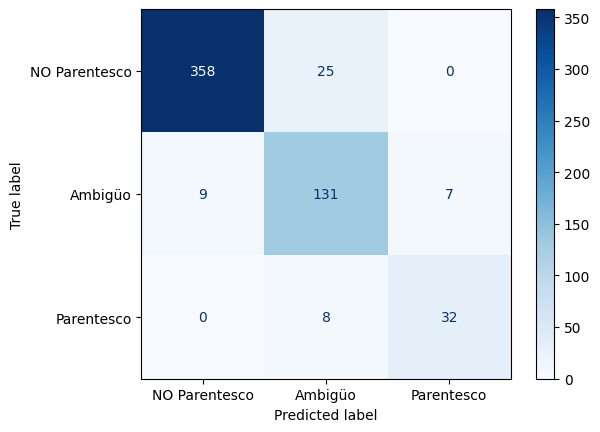

In [10]:
# Print the confusion matrix

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr, display_labels=['NO Parentesco', 'Ambigüo', 'Parentesco'])
cm_display.plot(cmap=plt.cm.Blues)

In [11]:
# Print the metrics for the random forest model

print("===== Metrics for random forest Model =====")
print(classification_report(y_test, y_pred_lr, target_names=['NO Parentesco', 'Ambigüo', 'Parentesco']))

===== Metrics for random forest Model =====
               precision    recall  f1-score   support

NO Parentesco       0.98      0.93      0.95       383
      Ambigüo       0.80      0.89      0.84       147
   Parentesco       0.82      0.80      0.81        40

     accuracy                           0.91       570
    macro avg       0.86      0.88      0.87       570
 weighted avg       0.92      0.91      0.92       570



---

## Random Forest base con múltiples variables

Modelo de random forest entrenado con hiperparámetros por defecto basado en variables de entrenamiento: ***("Shared_Markers", "k0", "k1", "k2", "Share_allele", "ValueLog10 (LR)")***

In [12]:
# Base Random Forest model 

rf_model = RandomForestClassifier(n_jobs=-1)

In [13]:
# Training and evaluation of the random forest model

rf_model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


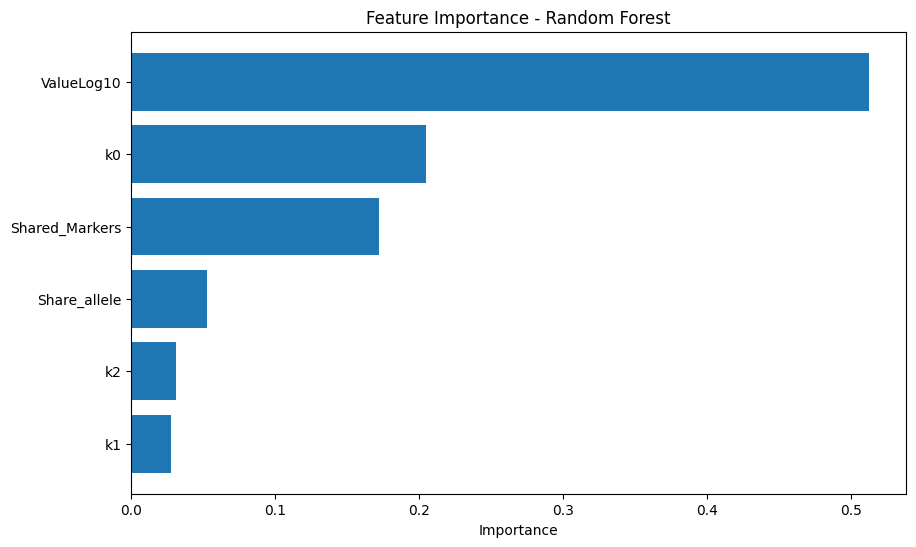

In [14]:
importances = rf_model.feature_importances_
# Crear DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualizar
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.title("Feature Importance - Random Forest")
plt.gca().invert_yaxis()
plt.show()

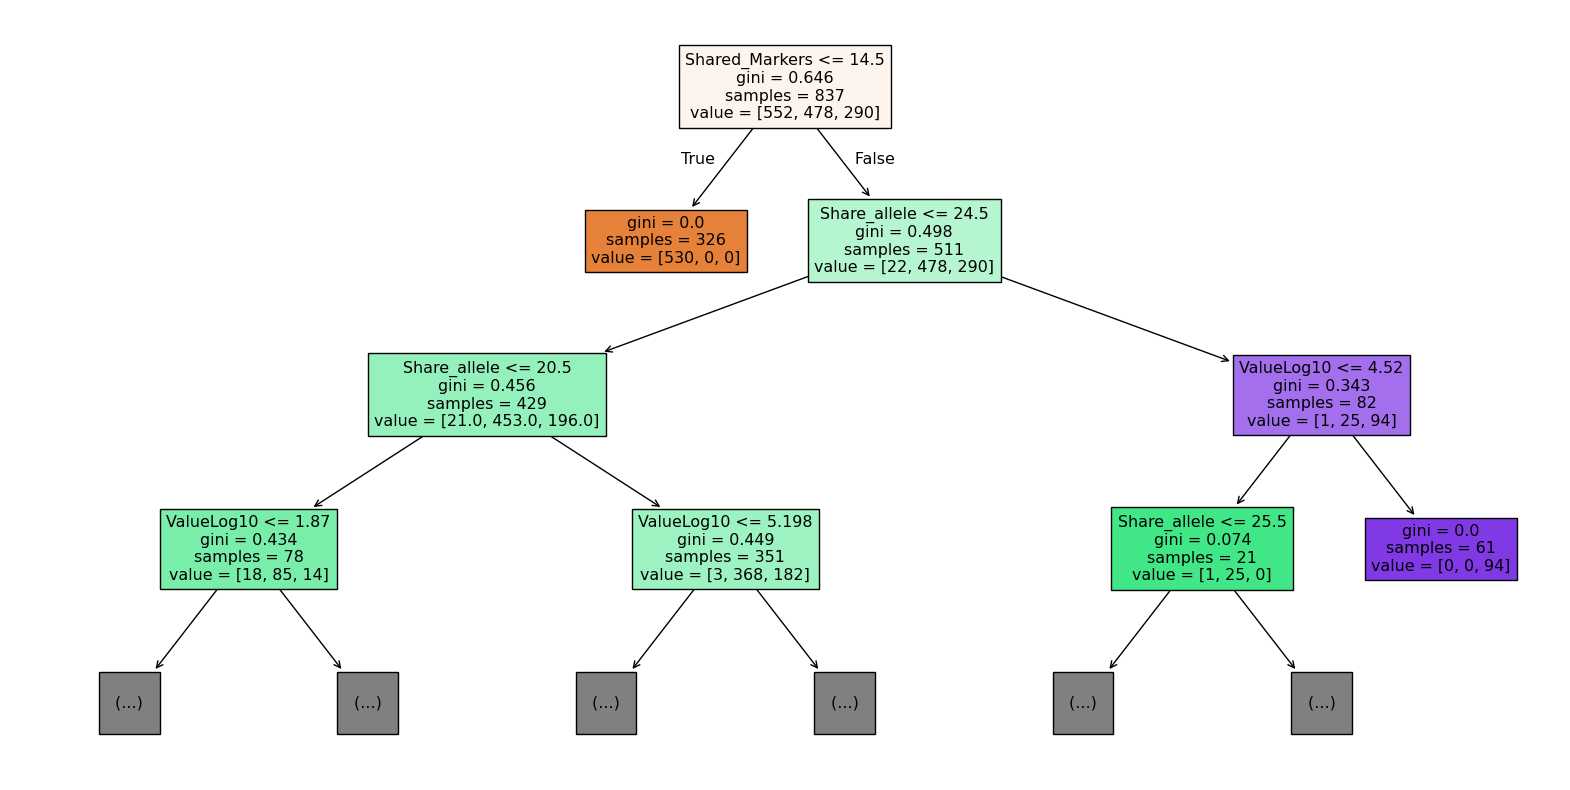

In [15]:
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=feature_columns, filled=True, max_depth=3)
plt.show()

In [16]:
y_pred = rf_model.predict(x_test)

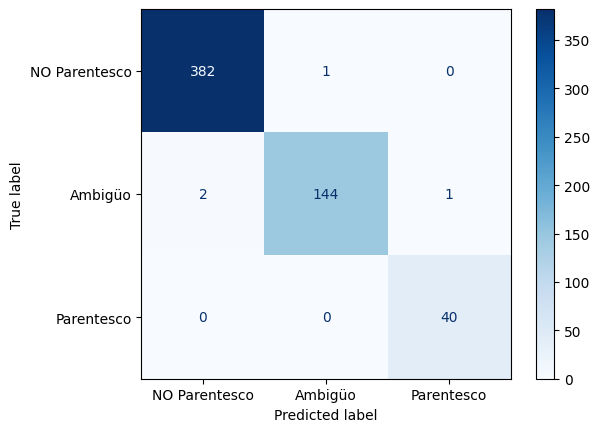

In [17]:
# Print the confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['NO Parentesco', 'Ambigüo', 'Parentesco'])
cm_display.plot(cmap=plt.cm.Blues)

In [18]:
# Print the metrics for the random forest model

print("===== Metrics for random forest Model =====")
print(classification_report(y_test, y_pred, target_names=['NO Parentesco', 'Ambigüo', 'Parentesco']))

===== Metrics for random forest Model =====
               precision    recall  f1-score   support

NO Parentesco       0.99      1.00      1.00       383
      Ambigüo       0.99      0.98      0.99       147
   Parentesco       0.98      1.00      0.99        40

     accuracy                           0.99       570
    macro avg       0.99      0.99      0.99       570
 weighted avg       0.99      0.99      0.99       570



---

## Regresión logística con múltiples variables aplicando Grid Search

Búsqueda de los mejores hiperparámetros usando Grid Search con variables múltiples.

In [19]:
# Base Random Forest model 

rf_model = RandomForestClassifier(n_jobs=-1)

In [20]:
# Hyperparameter tuning with Grid Search

param_grid = [
    {
        'n_estimators': [100, 200, 300],
        'criterion': ['gini', 'entropy', 'log_loss'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10, 15, 20],
        'min_samples_leaf': [1, 2, 4, 5, 10],
        'n_jobs': [-1]
    }
]

In [21]:

model_grid = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
best_model = model_grid.fit(x_train, y_train)

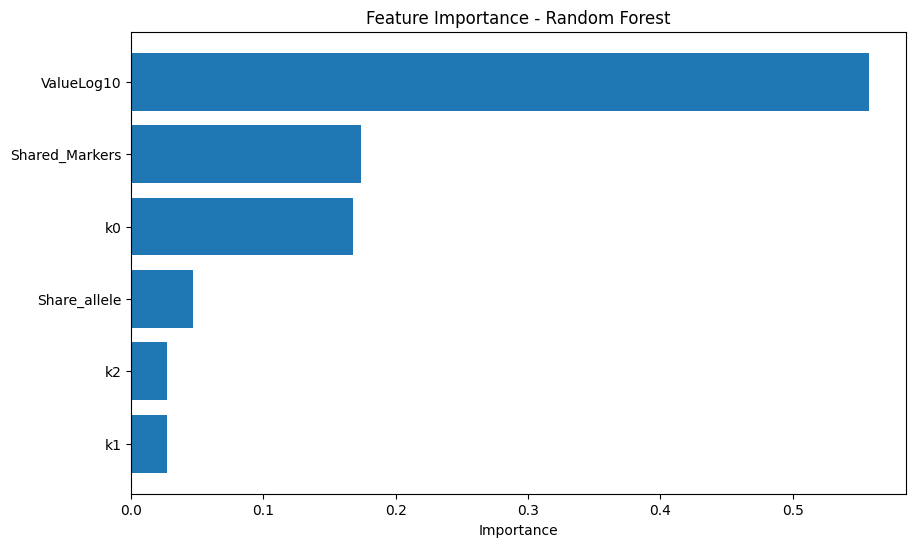

In [22]:
importances = best_model.best_estimator_.feature_importances_

# Crear DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualizar
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.title("Feature Importance - Random Forest")
plt.gca().invert_yaxis()
plt.show()

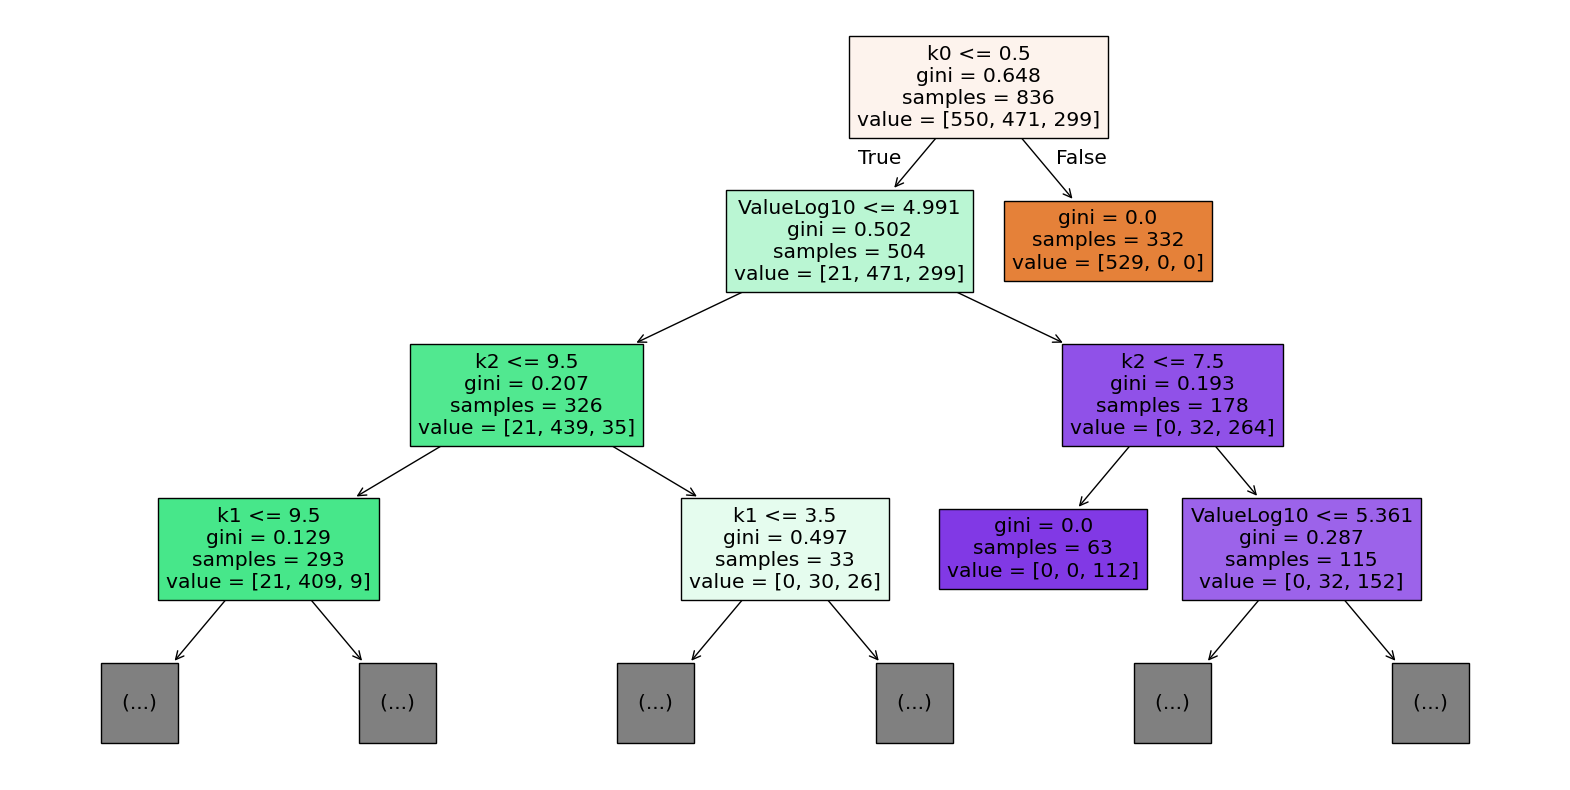

In [23]:
plt.figure(figsize=(20, 10))
plot_tree(best_model.best_estimator_.estimators_[0], feature_names=feature_columns, filled=True, max_depth=3)
plt.show()

In [24]:
y_best_pred = best_model.predict(x_test)

In [25]:
# Print the best parameters found by Grid Search

print("Best parameters found by Grid Search:")
print(best_model.best_params_)
best_model.best_estimator_

Best parameters found by Grid Search:
{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1}


,n_estimators,200
,criterion,'gini'
,max_depth,20
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


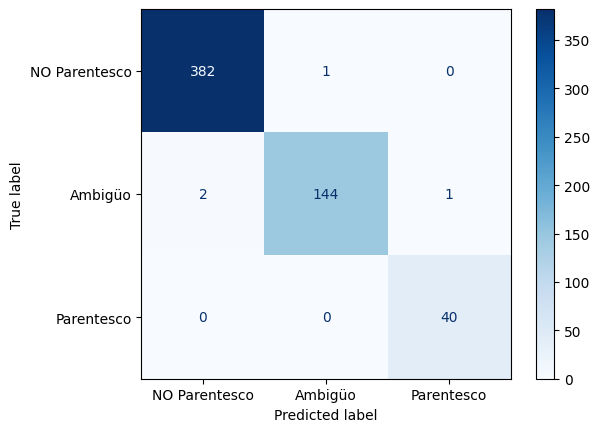

In [26]:
# Print the confusion matrix

conf_matrix = confusion_matrix(y_test, y_best_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['NO Parentesco', 'Ambigüo', 'Parentesco'])
cm_display.plot(cmap=plt.cm.Blues)

In [27]:
# Print the metrics for the random forest model

print("===== Metrics for random forest Model =====")
print(classification_report(y_test, y_best_pred, target_names=['NO Parentesco', 'Ambigüo', 'Parentesco']))

===== Metrics for random forest Model =====
               precision    recall  f1-score   support

NO Parentesco       0.99      1.00      1.00       383
      Ambigüo       0.99      0.98      0.99       147
   Parentesco       0.98      1.00      0.99        40

     accuracy                           0.99       570
    macro avg       0.99      0.99      0.99       570
 weighted avg       0.99      0.99      0.99       570



---

## Regresión logística con múltiples variables y sus mejores parámetros obtenidos

Modelo de regresión logística aplicando los mejores parámetros obtenidos mediante Grid Search entrenado con las variables: K1, K2, y LR (ValueLog10)

In [28]:
# Feature columns for the Random Forest model

feature_columns = ["k1", "k2", "ValueLog10"]

In [37]:
# Base Random Forest model with specific parameters

rf_model = RandomForestClassifier(criterion="gini", max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200, n_jobs=-1)

In [38]:
# New feature columns for the Random Forest model

x_train = df_train[feature_columns]
x_test = df_test[feature_columns]

In [39]:
# Train a random forest model

rf_model.fit(x_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,20
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


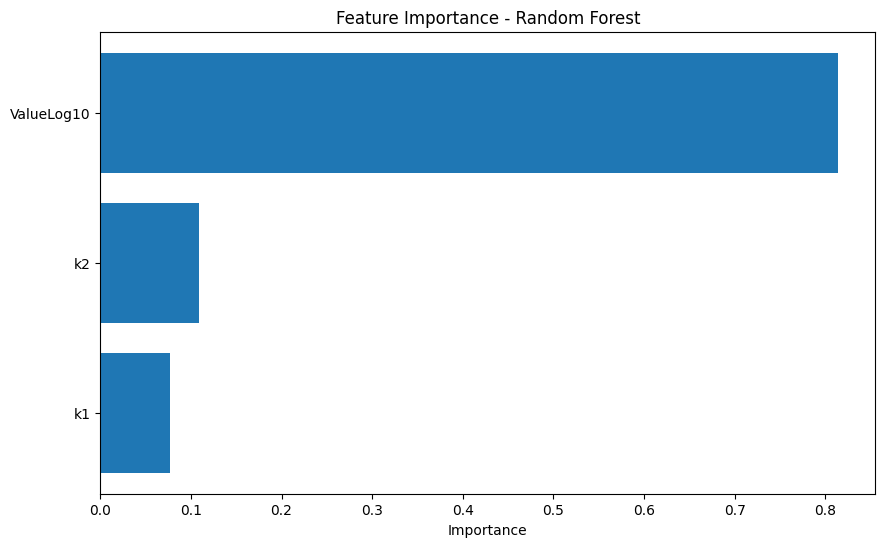

In [40]:
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualizar
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.title("Feature Importance - Random Forest")
plt.gca().invert_yaxis()
plt.show()

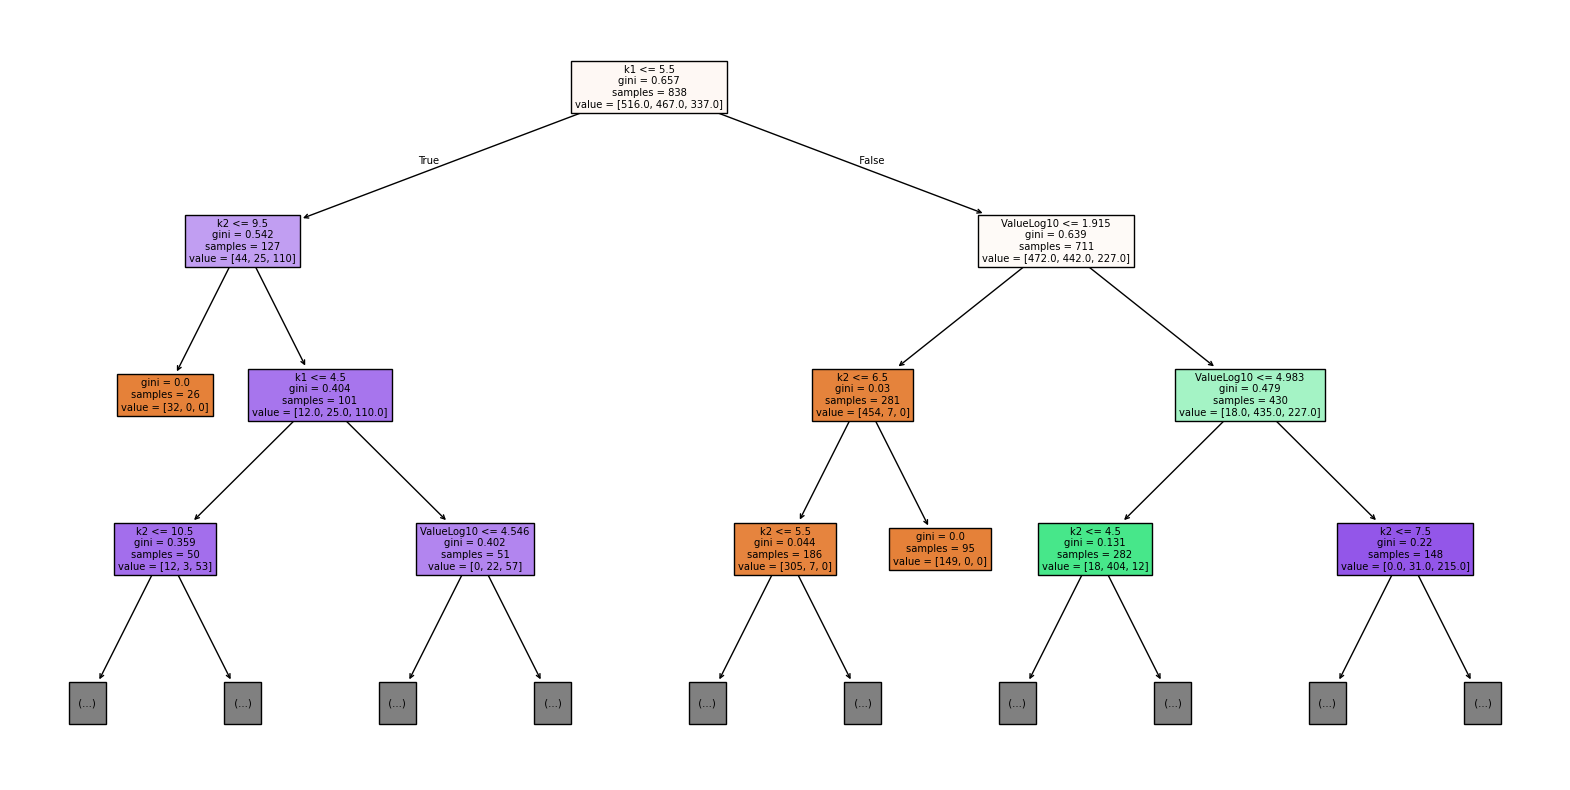

In [41]:
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=feature_columns, filled=True, max_depth=3)
plt.show()

In [42]:
y_pred = rf_model.predict(x_test)

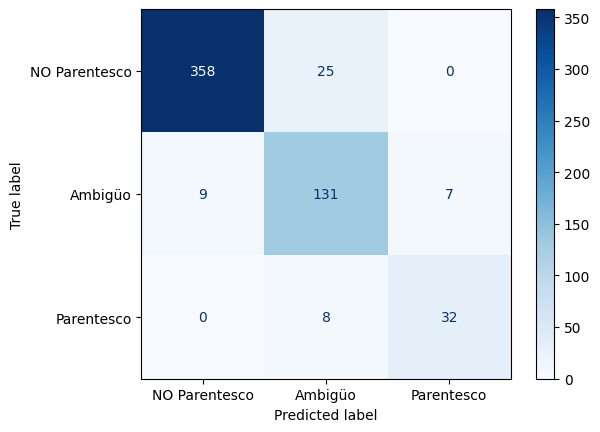

In [43]:
# Print the confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred_lr)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['NO Parentesco', 'Ambigüo', 'Parentesco'])
cm_display.plot(cmap=plt.cm.Blues)

In [44]:
# Print the metrics for the random forest model

print("===== Metrics for random forest Model =====")
print(classification_report(y_test, y_pred_lr, target_names=['NO Parentesco', 'Ambigüo', 'Parentesco']))

===== Metrics for random forest Model =====
               precision    recall  f1-score   support

NO Parentesco       0.98      0.93      0.95       383
      Ambigüo       0.80      0.89      0.84       147
   Parentesco       0.82      0.80      0.81        40

     accuracy                           0.91       570
    macro avg       0.86      0.88      0.87       570
 weighted avg       0.92      0.91      0.92       570

